# BREAST CANCER CLASSIFICATION

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Loading Data file

In [2]:
data=pd.read_csv(r'C:\Users\user\OneDrive\Desktop\data.csv')

In [3]:
#printing 1st 5 rows of the data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#Checking the shape of the data
x=data.shape
print("Shape of the data:\n rows:{} \n columns:{}".format(x[0],x[1]))

Shape of the data:
 rows:569 
 columns:33


In [5]:
#chekcing datatype of the variables
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
print("Only diagnosis variable is categorical  type and the rests are ofnumerical type.")

Only diagnosis variable is categorical  type and the rests are ofnumerical type.


In [7]:
#Checking for duplicate rows
print("No. of duplicate rows in our data:{}".format(data.duplicated().sum()))

No. of duplicate rows in our data:0


### Checking for missing values

In [8]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Text(0.5, 1.0, 'Missing Value Plot')

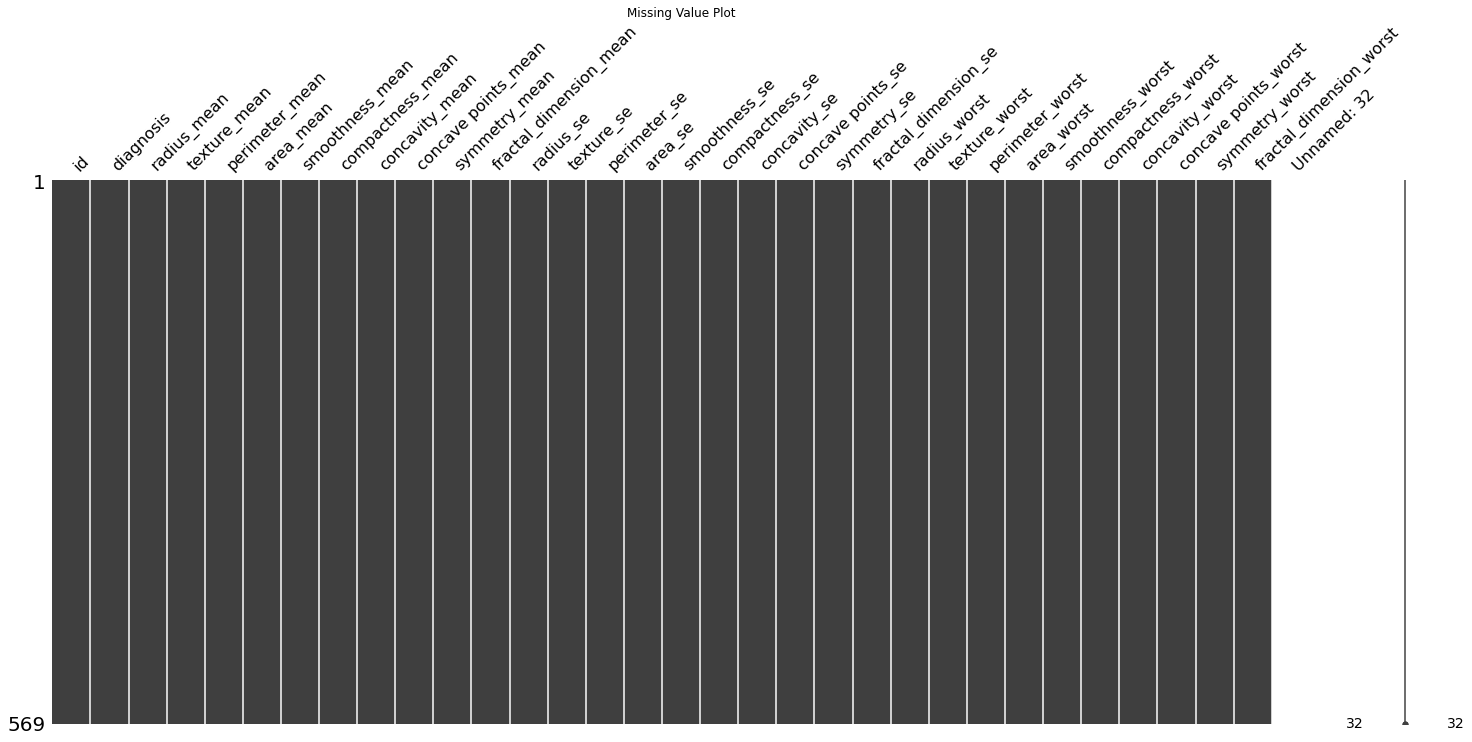

In [9]:
msn.matrix(data)
plt.title("Missing Value Plot")

In [10]:
print("Only \"Unnamed: 32 column\" contains 569 missing values ")

Only "Unnamed: 32 column" contains 569 missing values 


### Dropping unnecessary columns

In [11]:
print("we don't need 'id' & 'Unnamed:32' column")

we don't need 'id' & 'Unnamed:32' column


In [12]:
data1=data.drop(['id','Unnamed: 32'],axis=1)

## Data Visualization

In [13]:
#Checking no. of benign tumor & malignant tumor in our data
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

[Text(0.5, 1.0, 'Countplot of diagnosis'), Text(0.5, 0, 'Tumor Type')]

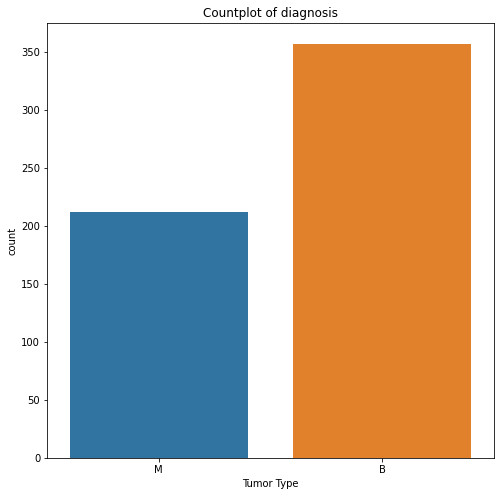

In [14]:
#visualising the variable diagnosis
plt.figure(figsize=(8,8))
sns.countplot(x="diagnosis",data=data1).set(title="Countplot of diagnosis",xlabel="Tumor Type")

## Relationship Between Features & Diagnosis

In [15]:
fields = ["mean", "se", "worst"]
columns = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave points", "symmetry", "fractal_dimension"]

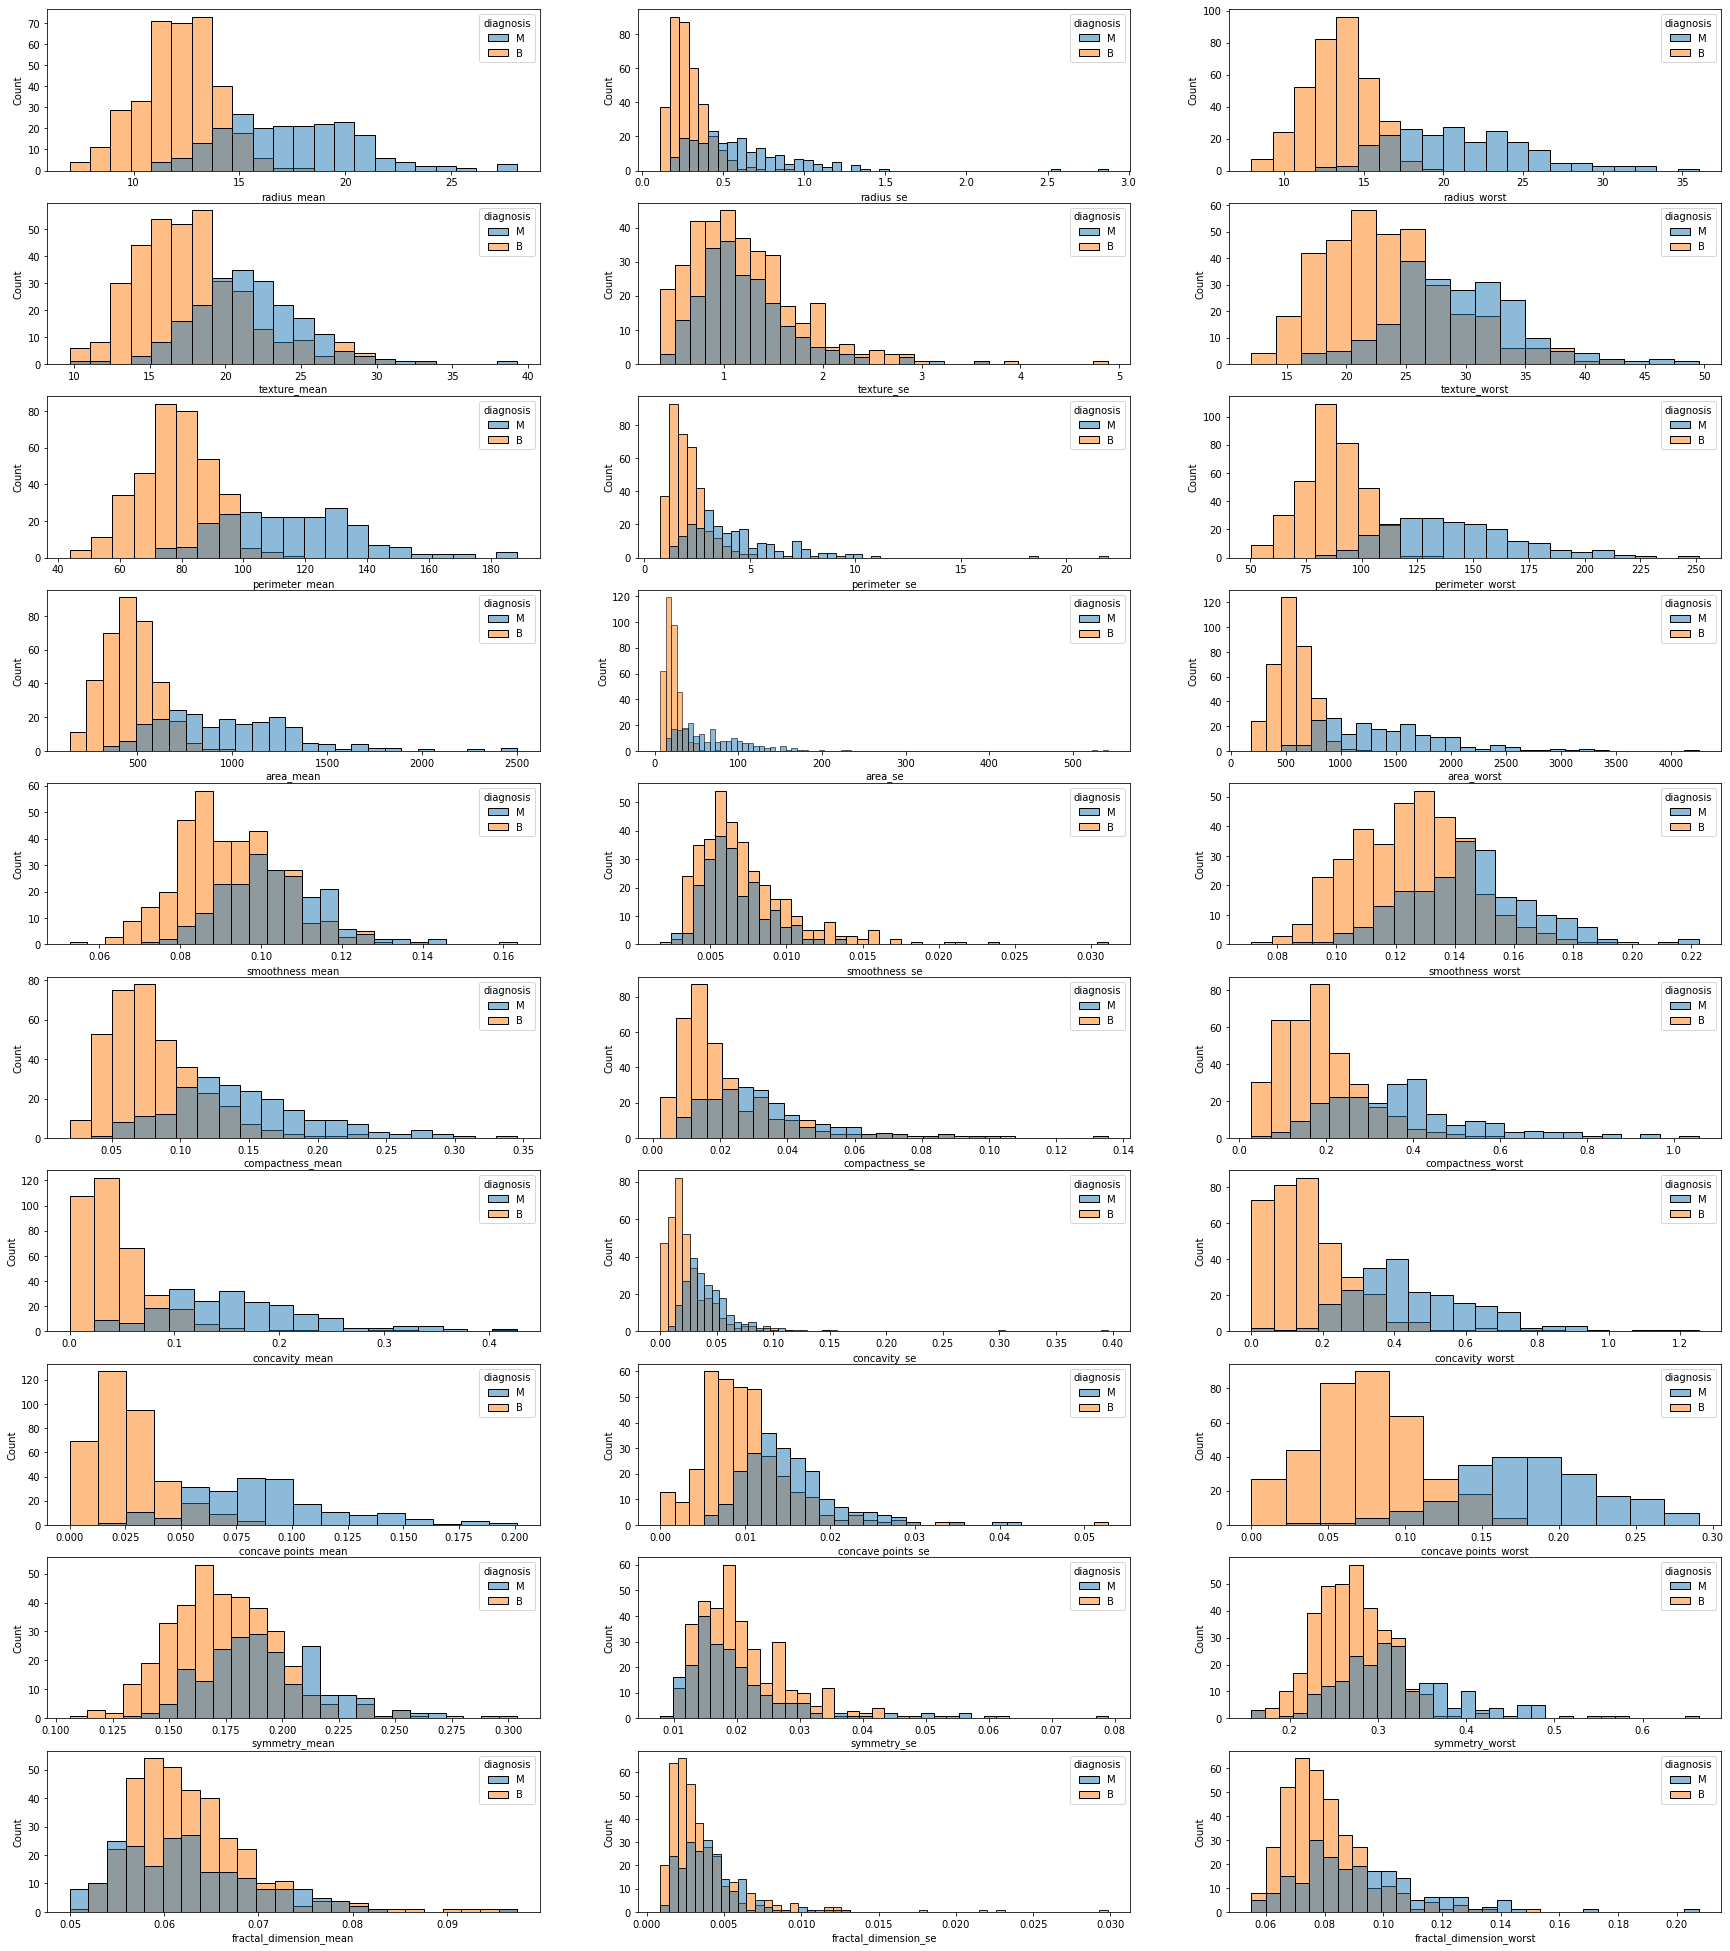

In [16]:
fig, axis = plt.subplots(10,3, figsize=(30,35))

for col in range(len(columns)):
    
    for f in range(len(fields)):
        
        sns.histplot(data1, 
                     x=columns[col]+"_"+fields[f], 
                     hue="diagnosis", 
                     stat="count", 
                     ax=axis[col][f])

#### Interpretation:

In [17]:
print("1) mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.")
print("2) mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. In any of the histograms there are no noticeable large outliers that warrants further cleanup.")

1) mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.
2) mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. In any of the histograms there are no noticeable large outliers that warrants further cleanup.


### Dummification of diagnosis variable

In [18]:
le=LabelEncoder()
data1['diagnosis']=le.fit_transform(data1['diagnosis'])

In [19]:
data1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
#spliting dataset into response and independent variables
y=data1['diagnosis']
X=data1.drop('diagnosis',axis=1)

In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

In [22]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Spliting The Data Into Training Set ,Validattion Set & Test Set

In [23]:
#spliting whole dataset 80:20 into training:validation set
X_train,X_val,y_train,y_val=train_test_split(X, y, train_size=0.8, random_state=10)
#spliting training set 87.5:12.5 into training:test set
X_train,X_test,y_train,y_test=train_test_split(X_train, y_train, train_size=0.8, random_state=10)

In [24]:
print("Dimensions of training set containing features:{}".format(X_train.shape))
print("Dimensions of validation set containing features:{}".format(X_val.shape))
print("Dimensions of test set containing features:{}".format(X_test.shape))

Dimensions of training set containing features:(364, 30)
Dimensions of validation set containing features:(114, 30)
Dimensions of test set containing features:(91, 30)


## Feature Selection based on Training Set

### 1) Removal of  Extremely Redundant Features using Correlation Plot

Text(0.5, 1.0, 'Correlation plot of all features ')

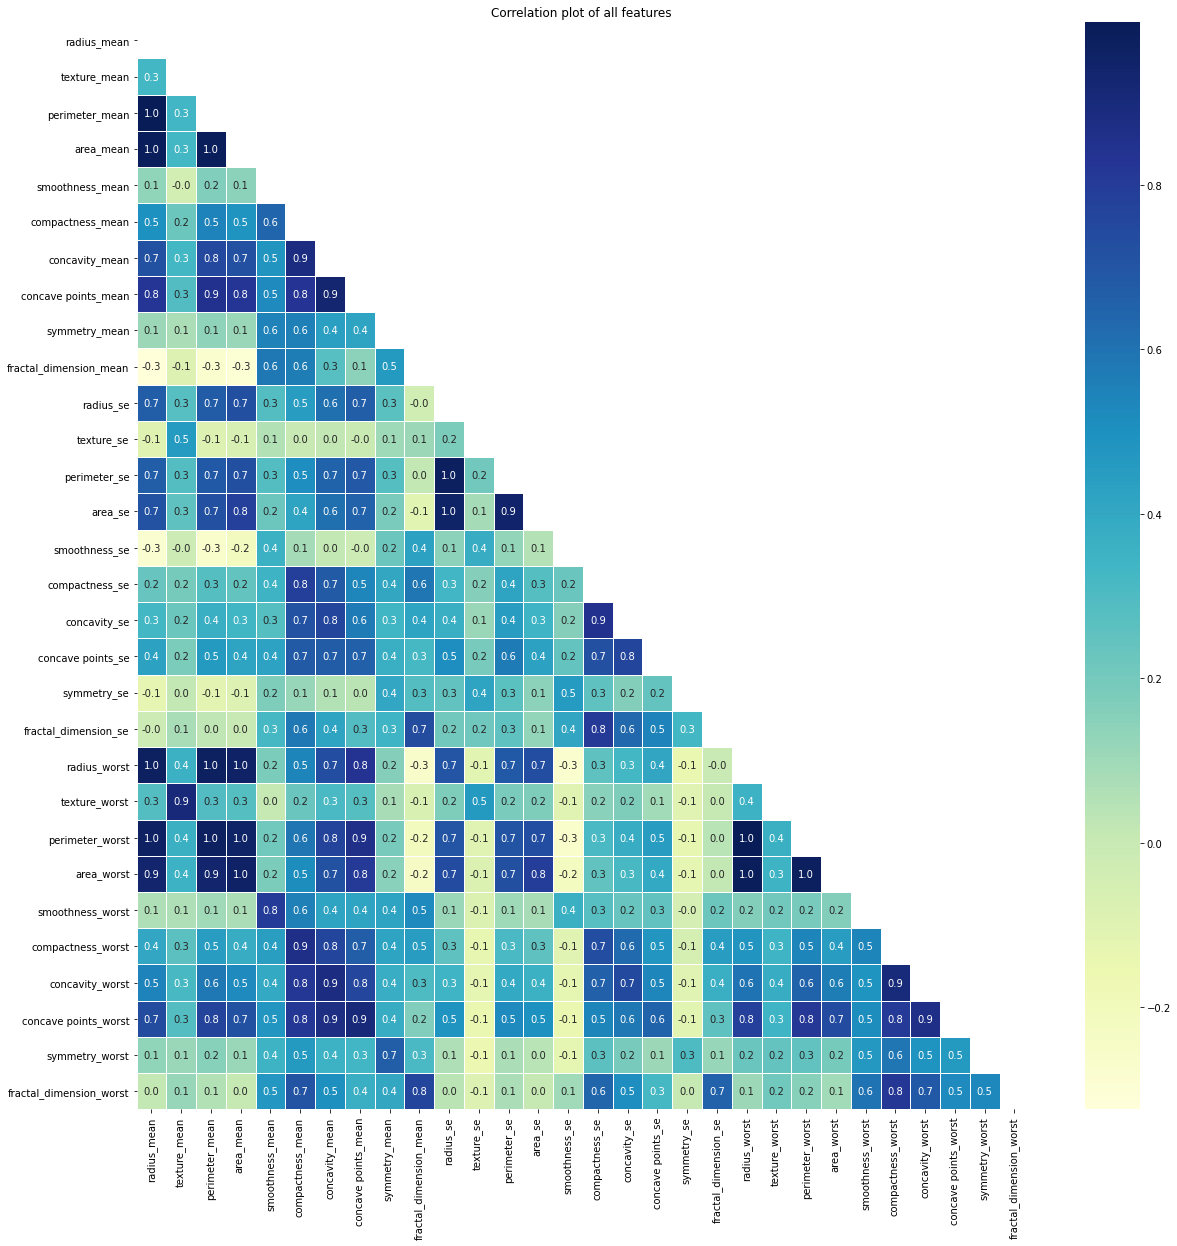

In [25]:
f,ax = plt.subplots(figsize=(20, 20))
mask=np.triu(np.ones_like(X_train.corr()))
sns.heatmap(X_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="YlGnBu",mask=mask)
plt.title("Correlation plot of all features ")

In [26]:
#Checking for pairs of features having correlation greater than 0r equal to 0.9

In [27]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr().abs()
    xFiltered = xCorr[(xCorr >= bound) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().drop_duplicates()
    xFlattened = xFlattened.dropna()
    return xFlattened

(corrFilter(X_train, .9))

radius_mean          perimeter_mean          0.998001
                     area_mean               0.986042
                     radius_worst            0.967732
                     perimeter_worst         0.962325
                     area_worst              0.938942
texture_mean         texture_worst           0.909515
perimeter_mean       area_mean               0.985604
                     radius_worst            0.968358
                     perimeter_worst         0.968292
                     area_worst              0.940502
area_mean            radius_worst            0.958779
                     perimeter_worst         0.954635
                     area_worst              0.956692
concavity_mean       concave points_mean     0.935943
concave points_mean  concave points_worst    0.908396
radius_se            perimeter_se            0.976096
                     area_se                 0.953734
perimeter_se         area_se                 0.945242
radius_worst         perimet

#### Observations:

In [28]:
print("1) due to high correlation between radius_mean,perimeter_mean & area_mean:we only use area_mean")                         
print("2) due to high correlation between concavity_mean & concave points_mean: we only use concavity_mean" )                                            
print("3) due to high correlation between radius_se,perimeter_se & area_se:we only use area_se")                                                                    
print("4) due to high correlation between concavity points_worst & concave points_mean: we only use concave points_worst")                        
print("5) due to high correlation between texture_mean & texture_worst:we only use texture_mean")                                                                              
print("6) due to high correlation between radius_worst,perimeter_worst & area_worst:we only use area_worst")

1) due to high correlation between radius_mean,perimeter_mean & area_mean:we only use area_mean
2) due to high correlation between concavity_mean & concave points_mean: we only use concavity_mean
3) due to high correlation between radius_se,perimeter_se & area_se:we only use area_se
4) due to high correlation between concavity points_worst & concave points_mean: we only use concave points_worst
5) due to high correlation between texture_mean & texture_worst:we only use texture_mean
6) due to high correlation between radius_worst,perimeter_worst & area_worst:we only use area_worst


In [29]:
# Redundant features to be deleted using correlation plot
drop_list=["radius_mean","perimeter_mean","concave points_mean","radius_se","perimeter_se","texture_worst","radius_worst","perimeter_worst"]

In [30]:
#deleting  extremely redundant features 
X1_train=X_train.drop(drop_list,axis=1)
X1_val=X_val.drop(drop_list,axis=1)
X1_test=X_test.drop(drop_list,axis=1)

### 2) Selecting Relevant Features useful in Predicting Response using Mutual Information

In [31]:
fs = SelectKBest(score_func=mutual_info_classif, k=11)
selection = SelectKBest(mutual_info_classif, k=11).fit(X1_train, y_train)
features = X1_train.columns[selection.get_support()]
print(features)

Index(['texture_mean', 'area_mean', 'compactness_mean', 'concavity_mean',
       'area_se', 'concavity_se', 'concave points_se', 'area_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')


In [32]:
#filtering Training,Validation & Test sets of features using selected features
X1_train_fs = X1_train[features]
X1_val_fs=X1_val[features]
X1_test_fs=X1_test[features]

In [33]:
#Scaling of features
scaler=StandardScaler()
scaler.fit(X1_train_fs)
X1_train_scaled=pd.DataFrame(scaler.transform(X1_train_fs),columns=X1_train_fs.columns)
X1_val_scaled=pd.DataFrame(scaler.transform(X1_val_fs),columns=X1_val_fs.columns)
X1_test_scaled=pd.DataFrame(scaler.transform(X1_test_fs),columns=X1_test_fs.columns)

##  Data Modeling:

## 1) Logistic regression:

In [34]:
#fitting Logistic Regression
lr=LogisticRegression(max_iter=200)
lr.fit(X1_train_scaled, y_train)

LogisticRegression(max_iter=200)

accuracy score:0.9824561403508771
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        75
           1       0.97      0.97      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

roc_auc_Score:0.9805128205128206


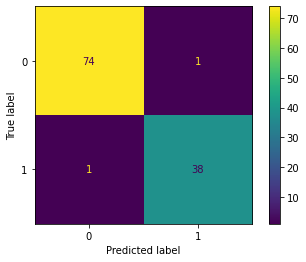

In [35]:
#checking performance of the fiited on validation set
y_pred_lr=lr.predict(X1_val_scaled)
print("accuracy score:{}".format(accuracy_score(y_pred_lr,y_val)))
cfm=confusion_matrix(y_val, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=lr.classes_)
disp.plot() 
print(classification_report(y_val, y_pred_lr))
print("roc_auc_Score:{}".format(metrics.roc_auc_score(y_val, y_pred_lr)))

## 2)Random Forrest:

In [36]:
#fitting Random Forrest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X1_train_scaled, y_train)

RandomForestClassifier()

accuracy score:0.9736842105263158
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

roc_auc_Score:0.9738461538461539


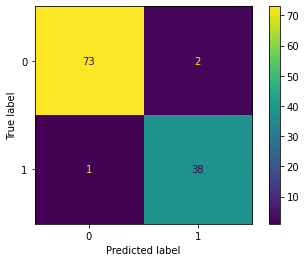

In [37]:
#checking performance of the fiited on validation set
y_pred_rf=rf.predict(X1_val_scaled)
print("accuracy score:{}".format(accuracy_score(y_pred_rf,y_val)))
cfm=confusion_matrix(y_val, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=rf.classes_)
disp.plot() 
print(classification_report(y_val, y_pred_rf))
print("roc_auc_Score:{}".format(metrics.roc_auc_score(y_val, y_pred_rf)))

## 3) Decision Tree:

In [38]:
#fitting decision tree
dt = DecisionTreeClassifier()
dt.fit(X1_train_scaled, y_train)

DecisionTreeClassifier()

accuracy score:0.956140350877193
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        75
           1       0.93      0.95      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

roc_auc_Score:0.9543589743589743


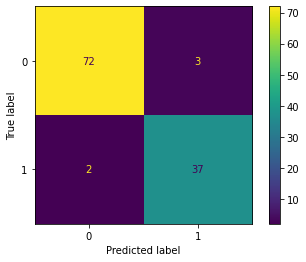

In [39]:
#checking performance of the fiited on validation set
y_pred_dt=dt.predict(X1_val_scaled)
print("accuracy score:{}".format(accuracy_score(y_pred_dt,y_val)))
cfm=confusion_matrix(y_val, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=dt.classes_)
disp.plot() 
print(classification_report(y_val, y_pred_dt))
print("roc_auc_Score:{}".format(metrics.roc_auc_score(y_val, y_pred_dt)))

## 4) Linear Discriminant Analysis:

In [40]:
#fitting Linear discriminant Analysis
lda= LinearDiscriminantAnalysis()
lda.fit(X1_train_scaled, y_train)

LinearDiscriminantAnalysis()

accuracy score:0.956140350877193
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        75
           1       1.00      0.87      0.93        39

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

roc_auc_Score:0.9358974358974359


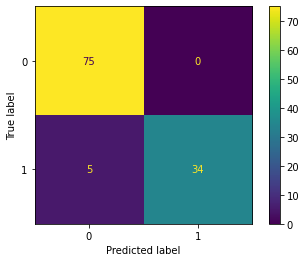

In [41]:
#checking performance of the fiited on validation set
y_pred_lda=lda.predict(X1_val_scaled)
print("accuracy score:{}".format(accuracy_score(y_pred_lda,y_val)))
cfm=confusion_matrix(y_val, y_pred_lda)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=lda.classes_)
disp.plot() 
print(classification_report(y_val, y_pred_lda))
print("roc_auc_Score:{}".format(metrics.roc_auc_score(y_val, y_pred_lda)))

# Choosing Optimal Model based on ROC-AUC Score:

In [42]:
print(" From the above analysis of different classification models on validation set: \n Comparing roc_ayc_score,we can see that Random Forrest and Logistic Regression performing much better than \n Decision Tree Classifier & Linear Discriminant analysis classifier \n ROC_AUC Score of  Random Forrest classifier is slightly better than that of Logistic Classifier for our validation set.")

 From the above analysis of different classification models on validation set: 
 Comparing roc_ayc_score,we can see that Random Forrest and Logistic Regression performing much better than 
 Decision Tree Classifier & Linear Discriminant analysis classifier 
 ROC_AUC Score of  Random Forrest classifier is slightly better than that of Logistic Classifier for our validation set.


### Interpretation: 

In [43]:
print("We choose Random Forrest Classifier as our optimal model.")

We choose Random Forrest Classifier as our optimal model.


## Random Forrest:Predictions using Test Set:

accuracy score:0.978021978021978
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        57
           1       1.00      0.94      0.97        34

    accuracy                           0.98        91
   macro avg       0.98      0.97      0.98        91
weighted avg       0.98      0.98      0.98        91

roc_auc_Score:0.9705882352941176


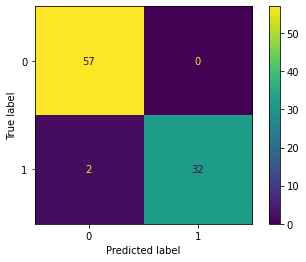

In [44]:
y_pred_test=rf.predict(X1_test_scaled)
print("accuracy score:{}".format(accuracy_score(y_pred_test,y_test)))
cfm=confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=rf.classes_)
disp.plot() 
print(classification_report(y_test, y_pred_test))
print("roc_auc_Score:{}".format(metrics.roc_auc_score(y_test, y_pred_test)))


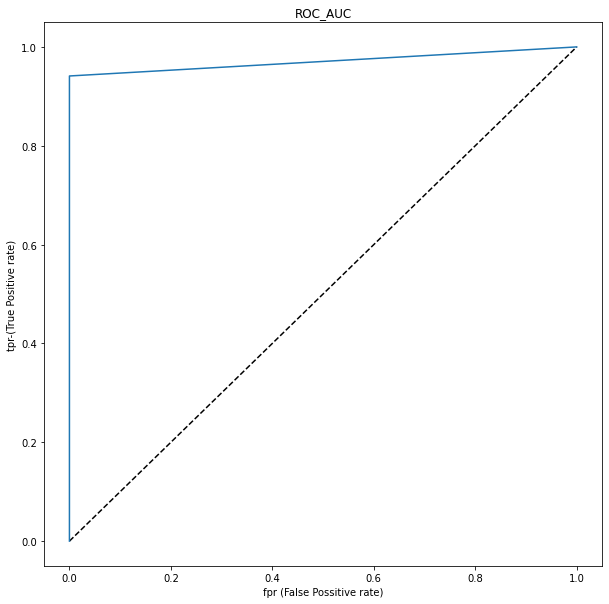

In [45]:
# Plotting ROC Curve
fpr, tpr,thresholds=roc_curve(y_test,y_pred_test)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Random Forrest')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title("ROC_AUC")
plt.show()

## Conclusion:

In [1]:
print("Our Fitted Random Forrest Classifier has a prediction accuracy:97.8% ROC_AUC score:0.97  on our test set,which is quite good.")

Our Fitted Random Forrest Classifier has a prediction accuracy:97.8% ROC_AUC score:0.97  on our test set,which is quite good.
